# Home Work 1. Anastasia Kishkun

The goal of the assignment is to perform an intensive visual analysis of a real-life dataset and to find a good feature representation for the data.

The original problem statement was to build an algorithm to classify time series into one of two classes. The data sets contain approximately 5000 of time series (the size of the training subsample is 1320). Each series consists of values for 500 time points and belongs to class {-1} or {1} column 'Target'. 

##  Load train and test data using pandas or numpy. 2 points.

#### First of all, let's import necessary libriraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()
%matplotlib inline

####  Looking for working directory for files import 

In [6]:
import os 
os.getcwd()

'C:\\Users\\admin\\Downloads'

####  Let's firstly import training data and have a look at the header

In [7]:
hw1_train = pd.read_csv('C:\\Users\\admin\\Downloads\\hw1\\hw1_train.csv')
hw1_train.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.14040,0.17164,0.30204,0.23280,0.033853,-0.22418,-0.46999,-0.645400,-0.61770,...,-0.31997,0.39090,0.97483,1.258700,1.14330,0.64709,-0.049582,-0.690400,-0.97660,-0.79426
1,-1,0.33404,0.32225,0.45384,0.67185,0.887900,1.02050,1.05980,1.030300,0.95075,...,0.43519,-0.34650,-0.92491,-1.208700,-1.24800,-1.14000,-1.041800,-1.041800,-1.15960,-1.37570
2,-1,0.71669,0.74437,0.72591,0.66133,0.555220,0.41359,0.24658,0.065273,-0.12111,...,3.17100,2.27600,1.21950,0.081881,-1.05030,-2.09290,-2.983300,-3.675300,-4.13660,-4.33960
3,1,1.24030,1.33120,1.38660,1.38320,1.306000,1.14280,0.87861,0.532290,0.14002,...,-0.82026,-1.12460,-1.30200,-1.340600,-1.27140,-1.14640,-1.011300,-0.931220,-0.93450,-1.00130
4,-1,-1.15950,-1.20420,-1.16760,-1.03350,-0.818170,-0.55812,-0.29929,-0.093691,0.02277,...,0.66085,0.44144,0.20618,-0.006941,-0.14692,-0.18308,-0.112380,0.008987,0.13141,0.18627


#### Let's also import testing data set and look for the header. 

In [8]:
hw1_test = pd.read_csv('C:\\Users\\admin\\Downloads\\hw1\\hw1_test.csv')
hw1_test.head()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
0,-1,-0.79717,-0.664390,-0.37301,0.040815,0.52694,0.98429,1.3531,1.5781,1.6593,...,1.12080,0.722420,0.36207,0.092083,-0.081268,-0.21257,-0.39146,-0.66439,-1.073800,-1.56430
1,1,0.80485,0.634630,0.37347,0.038343,-0.34099,-0.74086,-1.1097,-1.3954,-1.5702,...,0.38640,0.049213,-0.25814,-0.510580,-0.683650,-0.77382,-0.78525,-0.71489,-0.560440,-0.31909
2,-1,0.72799,0.111280,-0.49912,-1.068600,-1.57840,-1.99050,-2.3020,-2.5034,-2.5852,...,0.39446,0.463680,0.50773,0.517170,0.504590,0.47627,0.43851,0.39446,0.339400,0.25539
3,-1,-0.23444,-0.502160,-0.73249,-0.946130,-1.13970,-1.32330,-1.4902,-1.6071,-1.6204,...,-0.95280,-0.929440,-0.92276,-0.929440,-0.909410,-0.83597,-0.69577,-0.47879,-0.188710,0.11974
4,-1,-0.17133,-0.062285,0.23583,0.710400,1.24000,1.64980,1.8763,1.8655,1.7038,...,0.77619,0.725500,0.69745,0.731970,0.808540,0.83982,0.73305,0.43752,-0.026585,-0.60221


#### Let's prepare our data for future classification: 
We will split our data for features abd target: X_train, y_train, X_test, y_test

In [10]:
X_train = hw1_train.drop(['Target'], axis = 1)
y_train = hw1_train.Target

In [11]:
X_test = hw1_test.drop(['Target'], axis = 1)
y_test = hw1_test.Target

We were imported our data and now we go to the step 2:

# Plot & analyze several training examples of each class using plt.plot (from matplotlib import pyplot as plt). 3 points.

To plot and analyze several training examples we need to understand what data we have. First of all let's just randomly check some series from different targets and look on them 

###  Let's split our data by targets in 2 massives 
 

In [12]:
class1=hw1_train[hw1_train['Target']==1] 
class_1=hw1_train[hw1_train['Target']==-1] 
class1 = class1.drop('Target', axis =1)
class_1 = class_1.drop('Target', axis =1)


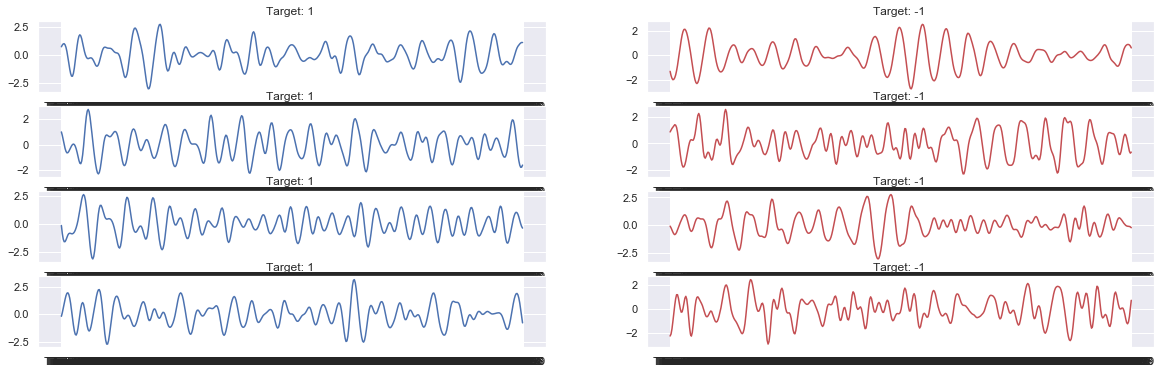

In [8]:
import random 
fig, ax = plt.subplots(figsize=(20, 6))
for i in range (0, 4):
    plt.subplot(4,2, i*2+1)
    plt.title('Target: 1 ')
    plt.plot(class1.iloc[random.randint(0,class1.shape[0])])
    plt.subplot(4,2,i*2+2)
    plt.title('Target: -1 ')
    plt.plot(class_1.iloc[random.randint(0,class_1.shape[0])],'-r')


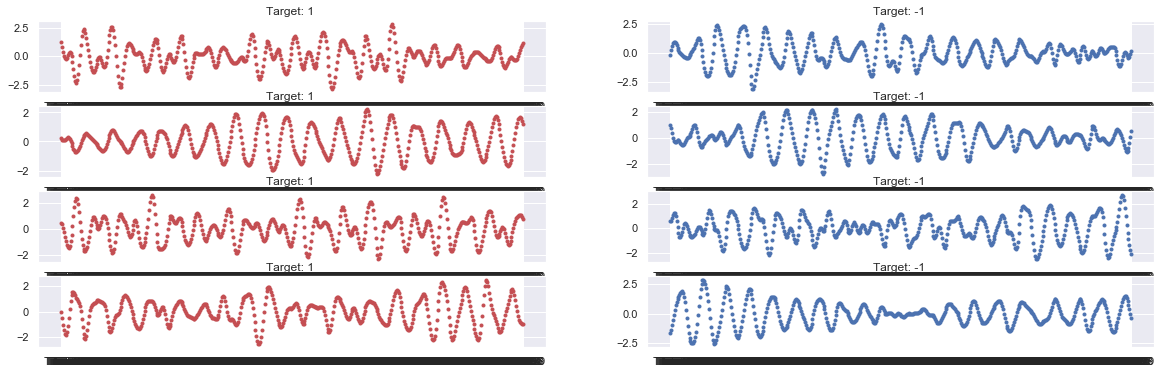

In [9]:
import random 
fig, ax = plt.subplots(figsize=(20, 6))
for i in range (0, 4):
    plt.subplot(4,2, i*2+1)
    plt.title('Target: 1 ')
    plt.plot(class1.iloc[random.randint(0,class1.shape[0])], '.r')
    plt.subplot(4,2,i*2+2)
    plt.title('Target: -1 ')
    plt.plot(class_1.iloc[random.randint(0,class_1.shape[0])],'.b')


### Let's analyse our data. It seems that right images have more peaks and more local maximums and minimums. But in general all data looks quite similar. Now we are going to step by step come to finding features for the next step. On this step it could me suggested to present our time series like a signals, differentiate the and count number of minimums and maximums. The classification rule would be like more then treshold value dedicated to the "-1" class and equal or less then  treshold dedicated to the "1" class

Of course, it's not the end of the second step and we will plot and analyze more training examples later on this work during experiments. 
# Propose several features potentially useful for classification (for example, the maximal absolute value of a time series). 5 points. 



####  Let's have a look on statistic

We see that mean value of Target is close to 0, that is one of the signs that in dataset both classes a presented in amount close to equal. 
We also see that std and mean values of Time-features a very close (mean is close to 0 and std is close to 1) that one of the signs that data are distributed in Gaussian distribution with identical mean and variance. 
It is also looks like that data in rowsand columns a very close, looks like they are generated by one function. 

In [10]:
hw1_train.describe()

,Target,Time-0,Time-1,Time-2,Time-3,Time-4,Time-5,Time-6,Time-7,Time-8,...,Time-490,Time-491,Time-492,Time-493,Time-494,Time-495,Time-496,Time-497,Time-498,Time-499
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,...,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,-0.031818,0.056002,0.049911,0.038883,0.024069,0.007442,-0.008919,-0.023496,-0.033576,-0.038521,...,-0.021316,-0.020575,-0.021015,-0.022639,-0.024066,-0.024627,-0.023276,-0.019195,-0.012906,-0.004523
std,0.999872,1.030456,1.027541,1.031559,1.037225,1.040995,1.041183,1.039772,1.037451,1.032377,...,0.997735,0.998892,1.003872,1.005504,1.001538,0.995778,0.995949,1.006262,1.021453,1.034001
min,-1.000000,-3.295300,-3.114200,-3.143400,-3.210100,-3.488700,-3.297400,-3.530600,-3.614100,-3.499100,...,-3.191000,-2.759400,-2.923200,-3.345700,-3.640700,-3.644500,-3.323400,-3.675300,-4.136600,-4.339600
25%,-1.000000,-0.615185,-0.622537,-0.647920,-0.703828,-0.710407,-0.704155,-0.701902,-0.726530,-0.725650,...,-0.659485,-0.667103,-0.675030,-0.701325,-0.666675,-0.639500,-0.675743,-0.684493,-0.703070,-0.668713
50%,-1.000000,0.060756,0.063215,0.072927,0.046644,-0.001561,-0.033439,-0.069241,-0.038386,-0.039849,...,-0.034602,-0.025947,-0.018704,-0.023849,-0.047471,-0.059076,-0.055776,-0.062619,-0.038624,-0.010347
75%,1.000000,0.725193,0.683445,0.708508,0.721960,0.711718,0.667813,0.662852,0.670717,0.656107,...,0.636785,0.645740,0.627622,0.626095,0.627945,0.618563,0.635045,0.610607,0.618785,0.642832
max,1.000000,3.972300,3.854800,3.500800,3.425200,3.603900,3.498300,3.202600,3.149200,3.149300,...,3.171000,3.038900,3.307500,3.440600,3.372700,3.878000,4.130700,4.099100,3.791200,3.696600


In [11]:
X_train.T.describe()

,0,1,2,3,4,5,6,7,8,9,...,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319
count,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,500.000000,5.000000e+02,5.000000e+02,...,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02
mean,-1.223200e-07,-2.746000e-07,1.224000e-07,7.515200e-07,-0.000001,-7.420000e-08,-3.983678e-07,-0.000001,-8.800000e-08,-9.692000e-07,...,-6.134000e-07,-8.180000e-07,9.477000e-07,3.686000e-07,-2.524000e-07,3.607800e-07,6.254000e-07,-3.286800e-07,2.508000e-07,-1.668000e-07
std,1.000000e+00,1.000002e+00,9.999996e-01,1.000000e+00,1.000000,1.000000e+00,9.999982e-01,1.000000,9.999984e-01,1.000001e+00,...,9.999993e-01,9.999976e-01,1.000001e+00,1.000000e+00,1.000002e+00,1.000000e+00,1.000002e+00,9.999993e-01,1.000002e+00,1.000000e+00
min,-3.138100e+00,-2.907600e+00,-4.339600e+00,-3.814400e+00,-2.496300,-2.179200e+00,-2.393100e+00,-2.659500,-2.467200e+00,-2.852200e+00,...,-2.969500e+00,-2.403600e+00,-2.426800e+00,-2.282400e+00,-2.796100e+00,-2.446100e+00,-2.868600e+00,-2.557500e+00,-2.103800e+00,-3.760900e+00
25%,-6.857850e-01,-7.245775e-01,-4.192475e-01,-6.804475e-01,-0.740960,-7.087750e-01,-6.814000e-01,-0.671307,-6.913400e-01,-6.981975e-01,...,-6.684100e-01,-6.264425e-01,-7.218125e-01,-6.729525e-01,-7.011875e-01,-7.342075e-01,-6.291525e-01,-6.628200e-01,-7.620375e-01,-6.196325e-01
50%,-1.575280e-03,3.918600e-02,1.526300e-02,-1.696250e-02,0.046734,-4.414450e-03,-5.267200e-03,-0.047190,8.135550e-02,2.384400e-03,...,-8.862900e-03,-1.009430e-02,-1.703500e-02,-1.566400e-02,3.791100e-02,-3.477550e-02,-5.945250e-02,-1.878900e-02,1.255385e-02,8.703150e-02
75%,6.981525e-01,7.121125e-01,3.686075e-01,6.359775e-01,0.677110,6.615900e-01,6.332850e-01,0.616425,6.142125e-01,6.274975e-01,...,6.299925e-01,7.535800e-01,7.340000e-01,6.689600e-01,6.974350e-01,7.472650e-01,7.195500e-01,7.096000e-01,7.108200e-01,6.443800e-01
max,2.885900e+00,2.699700e+00,4.315100e+00,2.974300e+00,2.623400,2.641000e+00,3.184300e+00,2.954900,2.771200e+00,2.632600e+00,...,2.786000e+00,2.394500e+00,2.578900e+00,2.502800e+00,2.639100e+00,2.464400e+00,2.981100e+00,2.933200e+00,2.543600e+00,2.868100e+00


#### Target histogram 
It seems that data are very homogeneous. On this step we will try not only to provide some examples but also do the step to the finding of useful feature. Let's see does our dataset provide enough examples of each class? 

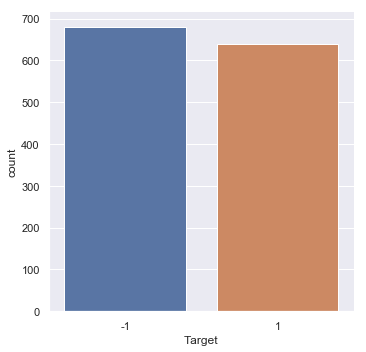

In [12]:
sns.catplot(x="Target", kind="count", data=hw1_train)

The answer is on the plot: the number of values in each class are close. 

#### column KDE 
The results presented on a histogram dedicated to good dataset with enough examples of each class (similar number of examples)
Let's split our dataset by target and see how data distributed in different features. For this action we will randomly chose 4 columns and plot the kernel density estimate.

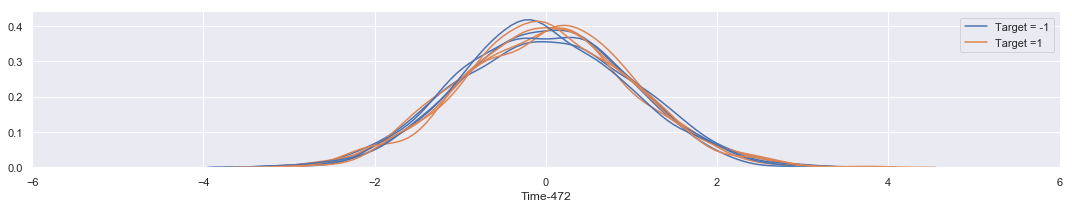

In [13]:
import random 

fg = sns.FacetGrid(hw1_train, hue="Target", aspect=5)
fg.map(sns.kdeplot,"Time-"+str(random.randint(0, X_train.shape[1])))
fg.map(sns.kdeplot,"Time-"+str(random.randint(0, X_train.shape[1])))
fg.map(sns.kdeplot,"Time-"+str(random.randint(0, X_train.shape[1])))
fg.map(sns.kdeplot,"Time-"+str(random.randint(0, X_train.shape[1])))
fg.set(xlim=(-6, 6));
plt.legend(['Target = -1', 'Target =1'])

#### Let's see distibutions in more details

Text(0.5, 1.0, 'Target: -1')

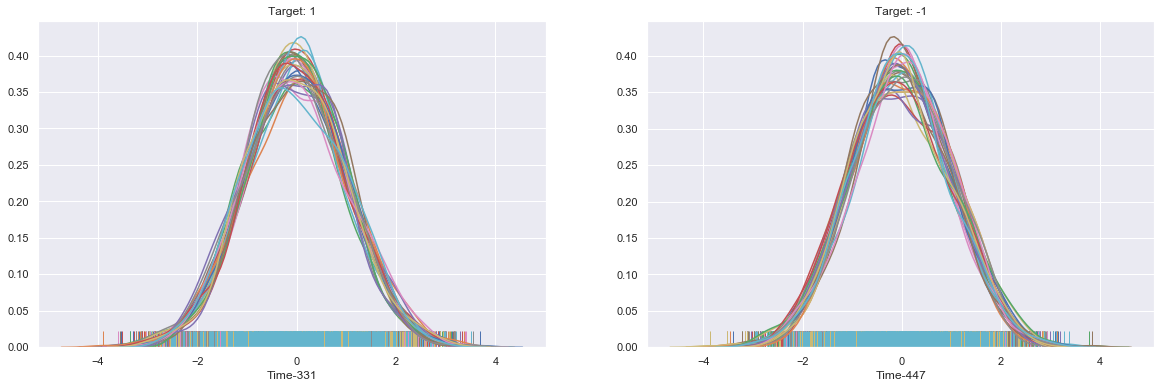

In [14]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
for i in range (0,30):
    a = random.randint(0, class1.shape[1]) 
    sns.distplot(class1.iloc[:,a],hist=False, rug=True)
plt.title('Target: 1')
plt.subplot(122)
for i in range (0,30):
    a = random.randint(0, class_1.shape[1]) 
    sns.distplot(class_1.iloc[:,a],hist=False, rug=True)
plt.title('Target: -1')

In columns values are looking quite similar in mean, mode, variance.
#### Let's have a look how data distributed in series
What can we conclude from this plots? They are looking quite similar in mean, mode, variance.
But it is very important that we are working with time series, and we should analyze the hole signal (500 features) but not the features. And there we see some differences, let's analyze them: their representation are not so similar. Actually, we have some plots with 2 maximums. However, we see the same situatuin on both plots.  

Text(0.5, 1.0, 'Target: -1')

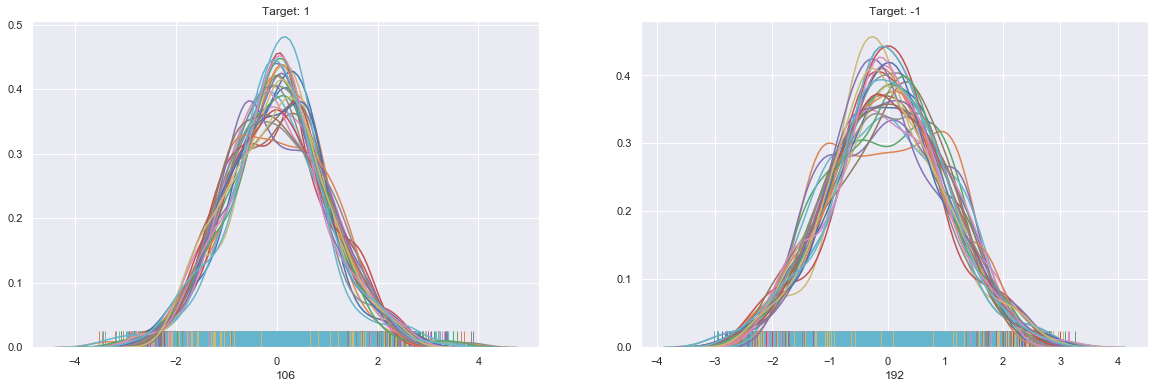

In [16]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
for i in range (0,30):
    a = random.randint(0, class1.shape[0]) 
    sns.distplot(class1.iloc[a],hist=False, rug=True)
plt.title('Target: 1')
plt.subplot(122)
for i in range (0,30):
    a = random.randint(0, class_1.shape[0]) 
    sns.distplot(class_1.iloc[a],hist=False, rug=True)
plt.title('Target: -1')

### Now we are going to estimate wether we need all this 500 of columns or not. 
Due to the reason of similarity of the data, we can't find features by just looking to data description. That's why I suggest to find correlation between columns and targets. 

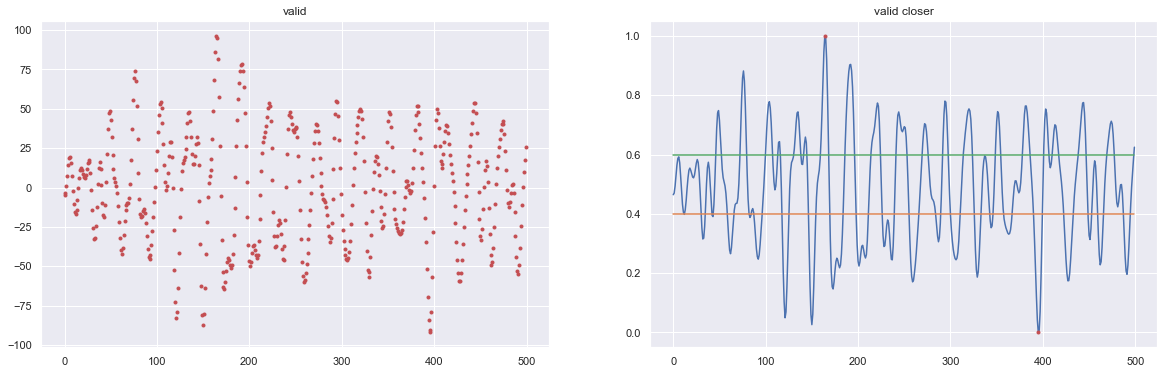

In [17]:
cor_mas_v = np.zeros(X_train.shape[1])
t = np.zeros(X_train.shape[1])

for i in range(0,X_train.shape[1]):
    cor_mas_v[i] = np.correlate(X_train.iloc[:,i], y_train,'valid')
    t[i] = i
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
plt.title(r'valid')
plt.plot(t,cor_mas_v,'.r')

plt.subplot(122)
plt.title('valid closer')

#let's see it closer 
cor_mas_v =  (cor_mas_v-cor_mas_v.min())/(cor_mas_v.max()-cor_mas_v.min())
plt.plot(t,cor_mas_v)
#how many values are influence on the result?
#maximum positive value and maximum negative are dedicated to direct and inverse dependencies
positive = np.argmax(cor_mas_v)
#print(positive)
negative = np.argmin(cor_mas_v)
#print(negative)
plt.plot(t, np.ones(X_train.shape[1])*0.4)
plt.plot(t, np.ones(X_train.shape[1])*0.6)
plt.plot(positive, cor_mas_v.max(),'.r')
plt.plot(negative, cor_mas_v.min(),'.r')


What do we see? The points between orange and green lines on the decond plot are close to zero, ot means that they are not very influence on the result. We can drop them and suggest other columns as features on the next step. 
#### Let's calculate how many columns we could drop

In [18]:

Xt = X_train.T
#print(Xt.T.shape)
for i in range(0, cor_mas_v.shape[0]):
    if((cor_mas_v[i]<0.6)&(cor_mas_v[i]>0.4)):
        Xt= Xt.drop(index='Time-'+str(i))
Xt = Xt.T
print(X_train.shape[1] - Xt.shape[1])


189


#### dropping 189 columns is not very opltimal decision: we could also have more than 300 features. Let's have a look what our positive and negative correlation provide us. And if it wouldn't be informative, we will drop more columns with low absolute correlation 

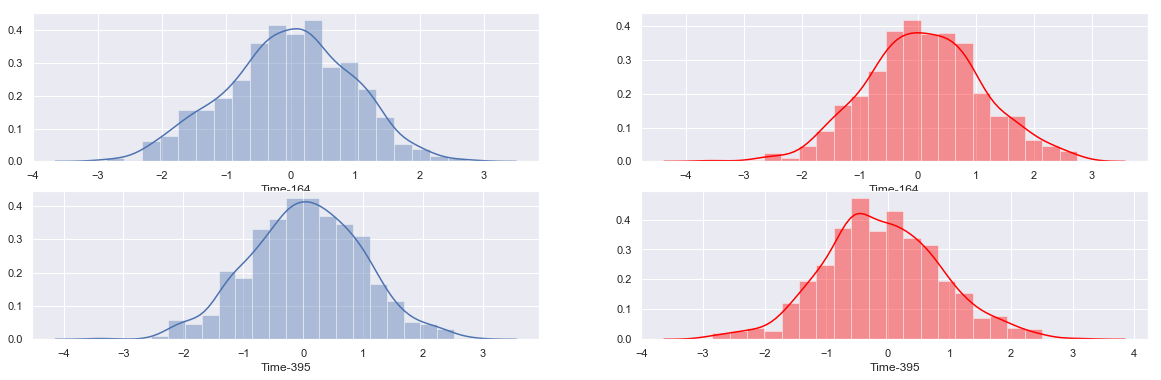

In [19]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.legend([str(y_train [positive]), str(y_train [negative])])
plt.subplot(2,2,1)
hwt=hw1_train[hw1_train['Target']==-1]
hwt1=hw1_train[hw1_train['Target']==1]
#print(hw1_train['Time-'+str(positive)])
sns.distplot(hwt['Time-'+str(positive)])
plt.subplot(2,2,2)
sns.distplot(hwt1['Time-'+str(positive)], color = 'red')
plt.subplot(2,2,3)
sns.distplot(hwt['Time-'+str(negative)])
plt.subplot(2,2,4)
sns.distplot(hwt1['Time-'+str(negative)], color = 'red')

In [20]:
# Let's try to change borders to recive less features 
Xt = X_train.T
#print(Xt.T.shape)
for i in range(0, cor_mas_v.shape[0]):
    if((cor_mas_v[i]<0.8)&(cor_mas_v[i]>0.2)):
        Xt= Xt.drop(index='Time-'+str(i))
Xt = Xt.T
print(X_train.shape[1] - Xt.shape[1])

459


In [22]:
#print(Xt.head())
#now we have 41 column that could be our features in the next step.
#let's see are they really what could we say about our data now
#print(Xt.columns.values)

493


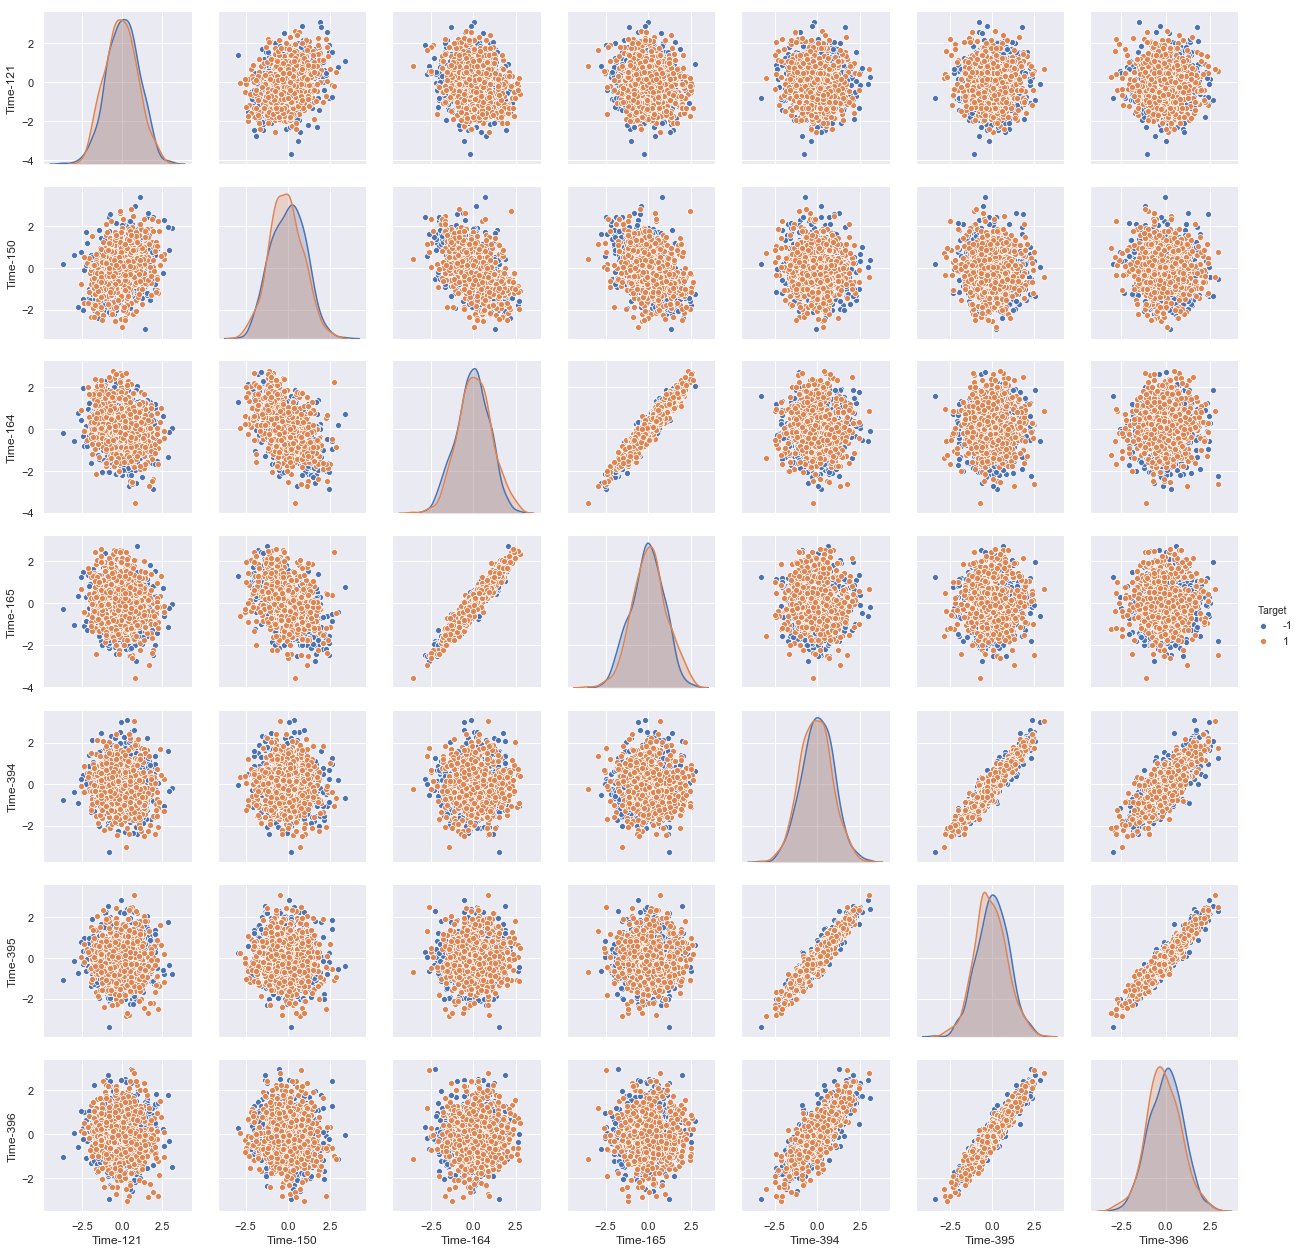

In [805]:
Xt = X_train.T 
for i in range(0, cor_mas_v.shape[0]):
    if((cor_mas_v[i]<0.95)&(cor_mas_v[i]>0.05)):
        Xt= Xt.drop(index='Time-'+str(i))
Xt = Xt.T
print(X_train.shape[1] - Xt.shape[1])
sns.pairplot(hw1_train, hue = 'Target', vars = Xt.columns.values)

#### on this type of plots we see that values of blue class are most of all around red class points. I suppose, that we have 2 ways there: 1 - chose not neighborhoods columns with high correlation value with target and classify by SVM classificator with kernel='poly', degree=2 (x^2+y^2 = 2) or 2 - chose neighborhoods columns with high correlation value with target and try to evaluate on linear regression 

# Calculate the proposed features using numpy and visualize (hint: ideally you will find a set of features with a small overlap between classes -1 and 1). 7 points.

Let's go back to step 3 and try to propose features that could help to split our dataset by simple desicions. 
And there we will start we looking how time series could be presented by mean, std, max absolute value etc
Let's start with mean

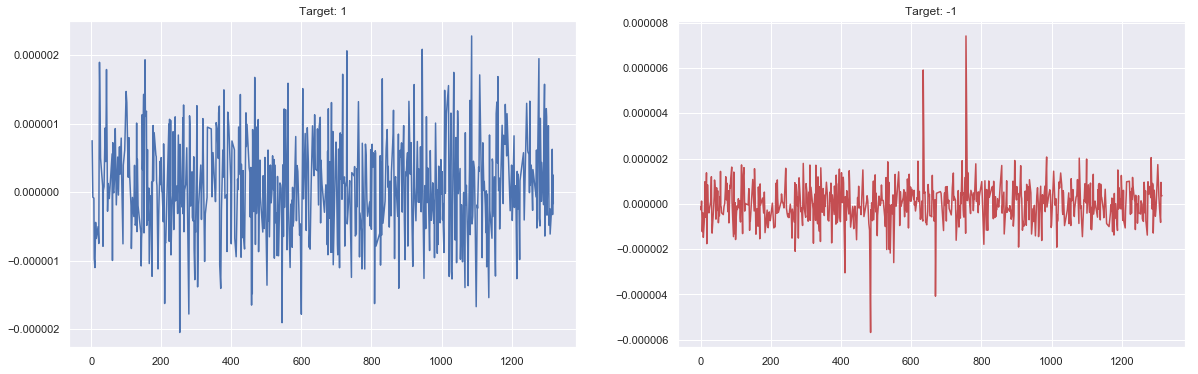

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
plt.title("Target: 1")
#plt.plot(tx, np.ones(class1.shape[1])*0.2,'.r')
plt.plot(class1.T.mean())
plt.subplot(122)
plt.title("Target: -1")
#plt.plot(t_x, np.ones(class_1.shape[1])*0.2,'.r')
plt.plot(class_1.T.mean(),'-r')


What did we recieve? The plots looking very different. But obviously we just have some values on the right plot that changes our y ax. Let's change plot y limitations too see real situation and also calculate how many values we have out of limits.  

8


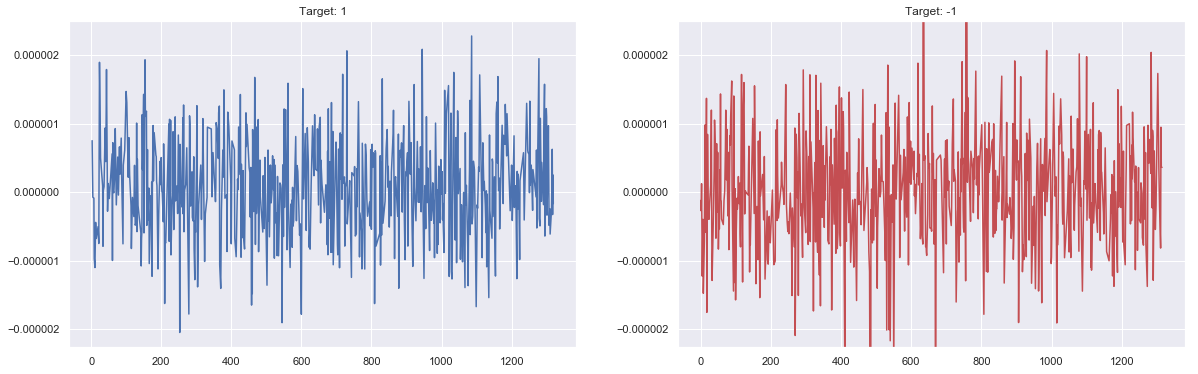

In [24]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.subplot(121)
plt.title("Target: 1")
plt.plot(class1.T.mean())
a = plt.ylim()
plt.subplot(122)
plt.ylim(a)
plt.title("Target: -1")
plt.plot(class_1.T.mean(),'-r')
mi =  class1.T.mean().min()
ma =  class1.T.mean().max()
count = 0
for i in range (0, class_1.T.mean().shape[0]):
    if ((class_1.T.mean().iloc[i]<mi)or(class_1.T.mean().iloc[i]>ma)):
        count =count+1
print(count)


Not so good results. We could recieve only 8 series, looks like a statisctical error
#### Let's have a look on std
We will do the same steps: look for the new data representation, limitate ax y and calculate the result

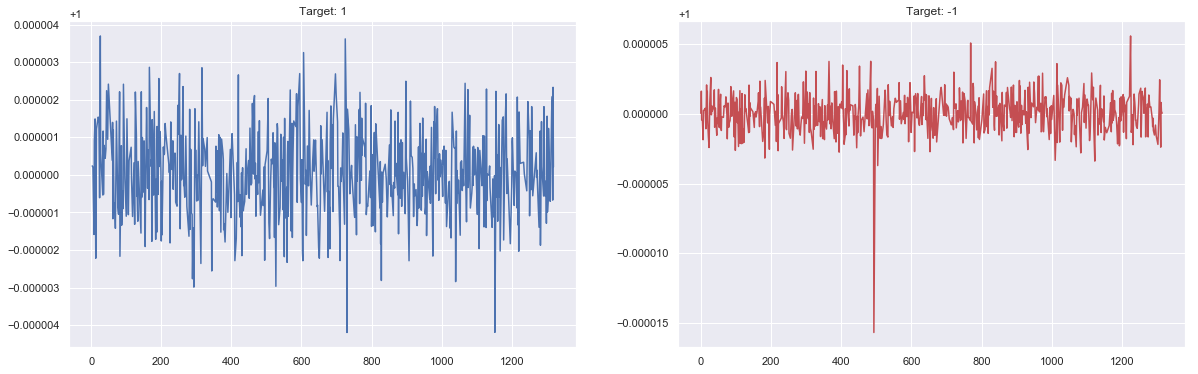

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
plt.title("Target: 1")
plt.plot(class1.T.std())
plt.subplot(122)
plt.title("Target: -1")
plt.plot(class_1.T.std(),'-r')

We see  one clear overshoot and cant't say more on this scale

(0.9999954094166038, 1.000004090442946)

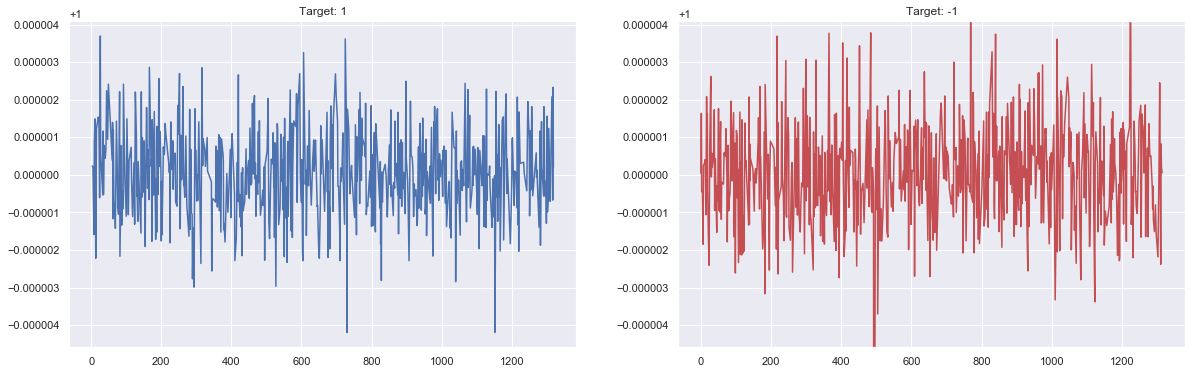

In [26]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
plt.title("Target: 1")
plt.plot(class1.T.std())
a = plt.ylim()
plt.subplot(122)
plt.title("Target: -1")
plt.plot(class_1.T.std(),'-r')
plt.ylim(a)

Let's calculate how much data is possible to split. This time we will try to make our ranges more smoothly

In [27]:
count = 0
er = (np.abs(a[0])+np.abs(a[1]))/((class_1.T.std().shape[0]+class1.T.std().shape[0])*1000)
mi =  class1.T.std().min()+er
ma =  class1.T.std().max()-er
for i in range (0, class_1.T.std().shape[0]):
    if ((class_1.T.std().iloc[i]<mi)or(class_1.T.std().iloc[i]>ma)):
        count =count+1
print(count)
count = 0
for i in range (0, class1.T.std().shape[0]):
    if ((class1.T.std().iloc[i]<mi)or(class1.T.std().iloc[i]>ma)):
        count =count+1
print(count)

43
32


Okay. It doesn't work. Let's have a look on other characterictics. 
And there we go to the 
####  maximum values.  

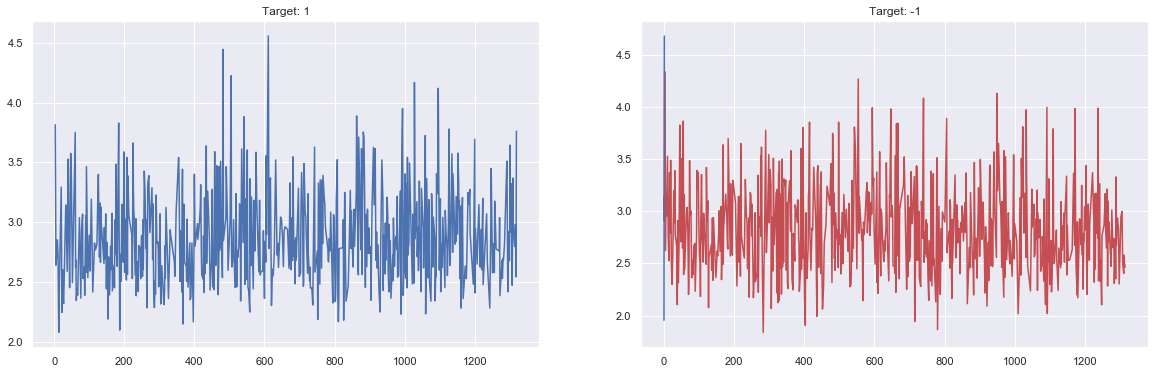

In [28]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.subplot(121)
plt.title("Target: 1")
plt.plot(np.abs(class1.T).max())
a = plt.ylim()
plt.subplot(122)
plt.title("Target: -1")
plt.plot(np.abs(class_1.T).max(),'-r')
plt.plot(a)

Looks similar. 
Let's believe that minimums would be more informative

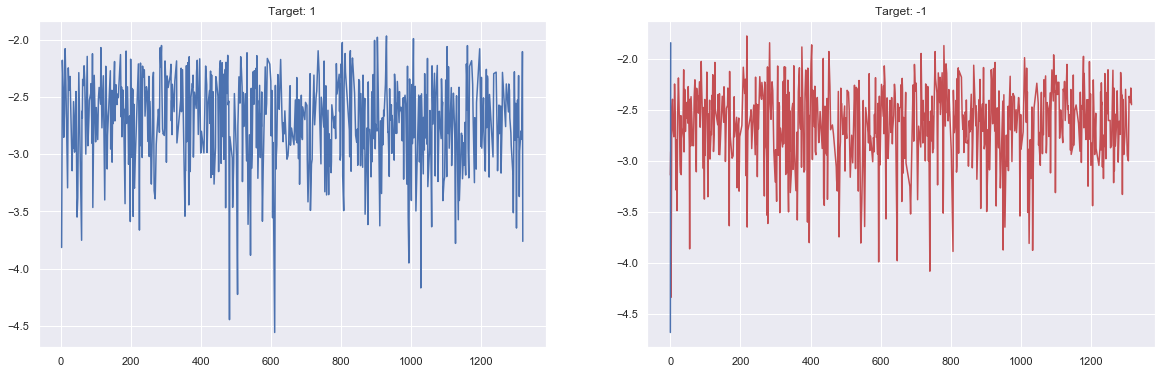

In [29]:
fig, ax = plt.subplots(figsize=(20, 6))

plt.subplot(121)
plt.title("Target: 1")
plt.plot((class1.T).min())
a = plt.ylim()
plt.subplot(122)
plt.title("Target: -1")
plt.plot((class_1.T).min(),'-r')
plt.plot(a)

Looks like we coould split some more values. Let's calculate how much

In [30]:
count = 0
#er = (np.abs(a[0])+np.abs(a[1]))/((class_1.T.std().shape[0]+class1.T.std().shape[0])*1000)
ma =  -3.5
#print(ma)
for i in range (0, class_1.T.min().shape[0]):
    if (class_1.T.min().iloc[i]<ma):
        count =count+1
print(count)
count = 0
for i in range (0, class1.T.min().shape[0]):
    if ((class1.T.min().iloc[i]<ma)):
        count =count+1
print(count)

27
26


Not effective. 
Okay. Let's have a look on minimum absolute value

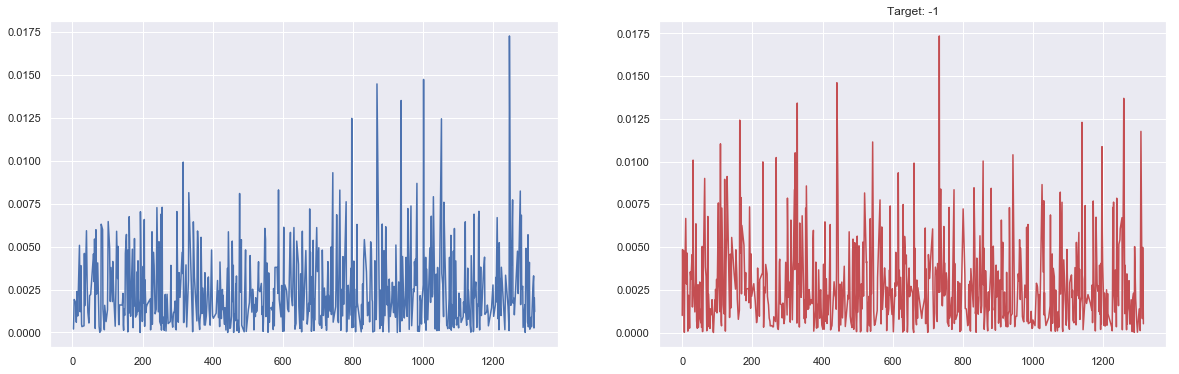

In [31]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.title("Target: 1")
plt.subplot(121)
plt.plot(np.abs(class1.T).min())
plt.subplot(122)
plt.title("Target: -1")
plt.plot(np.abs(class_1.T).min(),'-r')

#### we have find something informative. Let's calculate could we use this features

In [32]:
count = 0
ma =  0.0075
#print(ma)
for i in range (0, class_1.T.min().shape[0]):
    if (np.abs(class_1.T).min().iloc[i]>ma):
        count =count+1
print(count)
count = 0
for i in range (0, class1.T.min().shape[0]):
    if ((np.abs(class1.T).min().iloc[i]>ma)):
        count =count+1
print(count)

42
18


Looks better. But also not enough to create good classifier. 

What do we have now? 
It seems that we can't analyze data in this way. 
Let's go back to our previous results. 
##### We will start with the results with highcorrelated columns.  

In [33]:
Xt = X_train.T
for i in range(0, cor_mas_v.shape[0]):
    if((cor_mas_v[i]<0.8)&(cor_mas_v[i]>0.2)):
        Xt= Xt.drop(index='Time-'+str(i))
Xt = Xt.T
print(Xt.columns.values)    

['Time-75' 'Time-76' 'Time-77' 'Time-120' 'Time-121' 'Time-122' 'Time-123'
 'Time-148' 'Time-149' 'Time-150' 'Time-151' 'Time-152' 'Time-162'
 'Time-163' 'Time-164' 'Time-165' 'Time-166' 'Time-172' 'Time-173'
 'Time-174' 'Time-189' 'Time-190' 'Time-191' 'Time-192' 'Time-193'
 'Time-194' 'Time-258' 'Time-259' 'Time-260' 'Time-329' 'Time-393'
 'Time-394' 'Time-395' 'Time-396' 'Time-397' 'Time-398' 'Time-426'
 'Time-427' 'Time-428' 'Time-429' 'Time-491']


Let's have a look on recieving columns' labels. We have some sequences. 
Let's drop other columns from our tables and look what could we recieve

In [34]:
class1_new=hw1_train[hw1_train['Target']==1].drop((Xt.columns.values), axis=1) 
#print (class1_new.columns.values)
b = class1_new.columns.values
class1_new=hw1_train[hw1_train['Target']==1].drop(b, axis=1) 
class_1_new=hw1_train[hw1_train['Target']==-1].drop(b, axis=1) 
print (class1_new.shape)
print (class_1_new.shape)

(639, 41)
(681, 41)


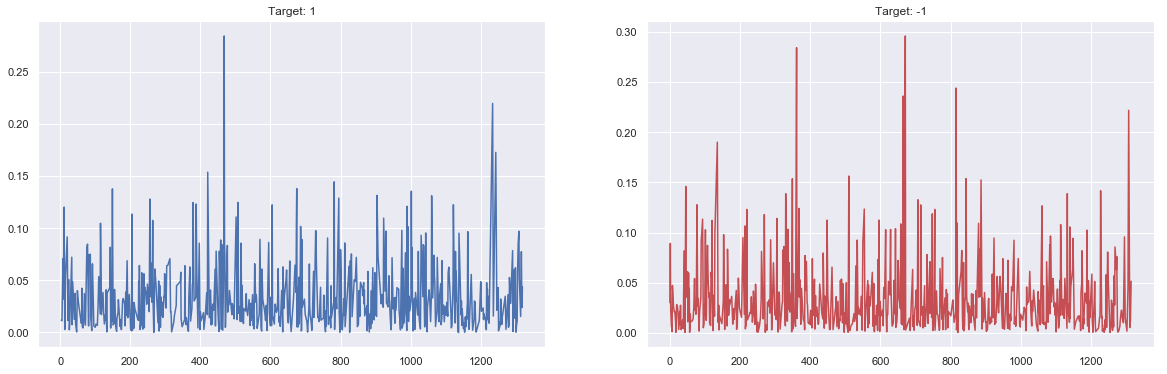

In [35]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(121)
plt.title("Target: 1")
plt.plot(np.abs(class1_new.T).min())
plt.subplot(122)
plt.title("Target: -1")
plt.plot(np.abs(class_1_new.T).min(),'-r')

It doesn't look much better
#### Okay. We could try to make features by our suggestion that was provided after pairplots (neighbor columns)
But I don't believe in this method for some reasons: first of all - ditributions are quite similar. Let's try to look on our numbers. We have very similar data, may be in a huge number of digits we could be able to group and analyze them? 
I've tried and it was very computationally hard. I wouldnt't provide the results here.

What else could we do? We are working with timeseries. Let's try to flatten our signals. We could simplify our signals by groupping our columns for example by mean. 
Let's do that and look for our curve
Let's check our suggestion. We will randomly check series and trying to simplify. 

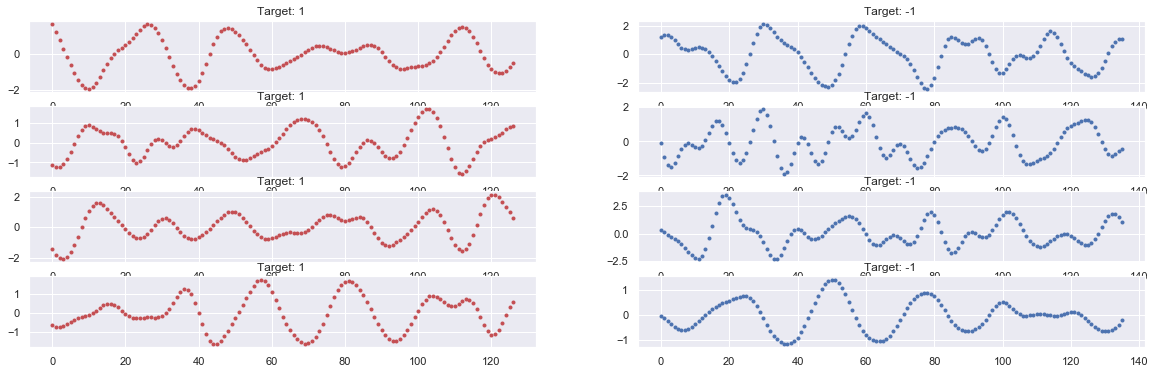

In [140]:
fig, ax = plt.subplots(figsize=(20, 6))
#print(class1.shape)
#class1 = class1.dropna(axis = 0, thresh =10)
#class_1 = class_1.dropna(axis = 0, thresh =10)
#print(class1.shape)
#print(class_1.shape)
k = 5
for i in range (0, 4):
    plt.subplot(4,2, i*2+1)
    plt.title('Target: 1 ')
    rnd = random.randint(0,class1.shape[0])
    class1_10=[]
    for j in range(0,int(class1.shape[0]/k)):
        class1_10.append(class1.iloc[rnd,j:j+4].mean())
        #print(class1_10)
    plt.plot(class1_10,'.r') 
    #print(np.array(class1_10))
    plt.subplot(4,2,i*2+2)
    plt.title('Target: -1 ')
    rnd = random.randint(0,class_1.shape[0])
    class_1_10=[]
    for j in range(0,int(class_1.shape[0]/k)):
        class_1_10.append(class_1.iloc[rnd,j:j+4].mean())
    plt.plot(class_1_10,'.b')  
    #print(np.array(class_1_10))

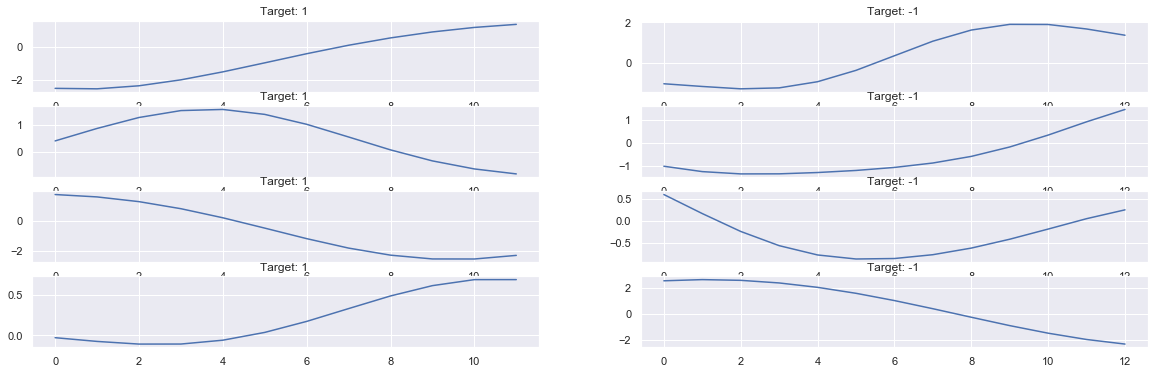

In [144]:
fig, ax = plt.subplots(figsize=(20, 6))
k = 50
for i in range (0, 4):
    plt.subplot(4,2, i*2+1)
    plt.title('Target: 1 ')
    rnd = random.randint(0,class1.shape[0])
    class1_10=[]
    for j in range(0,int(class1.shape[0]/k)):
        class1_10.append(class1.iloc[rnd,j:j+4].mean())
        #print(class1_10)
    plt.plot(class1_10) 
    #print(np.array(class1_10))
    plt.subplot(4,2,i*2+2)
    plt.title('Target: -1 ')
    rnd = random.randint(0,class_1.shape[0])
    class_1_10=[]
    for j in range(0,int(class_1.shape[0]/k)):
        class_1_10.append(class_1.iloc[rnd,j:j+4].mean())
    plt.plot(class_1_10)  
    #print(np.array(class_1_10))

(639, 500)
(639, 125)
(681, 500)
(681, 125)


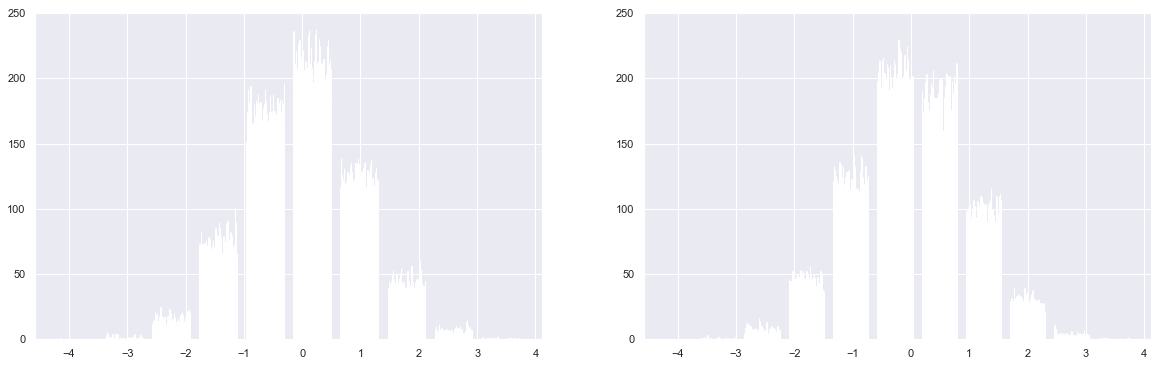

In [238]:
k = 4
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(1,2,1)
print(class1.shape)
class1_50 = np.zeros((class1.shape[0],int(class1.shape[1]/k)))
print(class1_50.shape)
for i in range(0,int(class1.shape[0])):
    for j in range(0,int(class1.shape[1]/k)):
           class1_50[i][j]=(class1.iloc[i,j:j+4].mean())
#print(class1_50)
class1_h = plt.hist(class1_50)
a = plt.ylim()
b = plt.xlim()
plt.subplot(1,2,2)
print(class_1.shape)
class_1_50 = np.zeros((class_1.shape[0],int(class_1.shape[1]/k)))
print(class_1_50.shape)
for i in range(0,int(class_1.shape[0])):
    for j in range(0,int(class_1.shape[1]/k)):
           class_1_50[i][j]=(class_1.iloc[i,j:j+4].mean())
#print(class1_50)
plt.ylim(a)
plt.xlim(b)
class_1_h = plt.hist(class_1_50)

I've tried different parameters, diffirent plots. I'd thought that I've found something but test accuracy wasn't much more than 50 percents. Finally,  I've also looked at moving average, randomly series, it was looked like we have different number of minimum and maximums in dfferent clases, I also tried to implement FFT. But it doen't work properly  
# My final suggestion is to calculate entropy for each raw.
Entropy is a measure of unpredictability of the state, or equivalently, of its average information content.

Let us have a look wether the results could be devided somehow or not

First of all, we need to calculate  P(X)

In [33]:
p1 = np.array(class1)/np.array(class1).sum(axis =1, keepdims=True)
p_1 = np.array(class_1)/np.array(class_1).sum(axis =1, keepdims=True)

let's plot new data representation

(639, 500)
(681, 500)


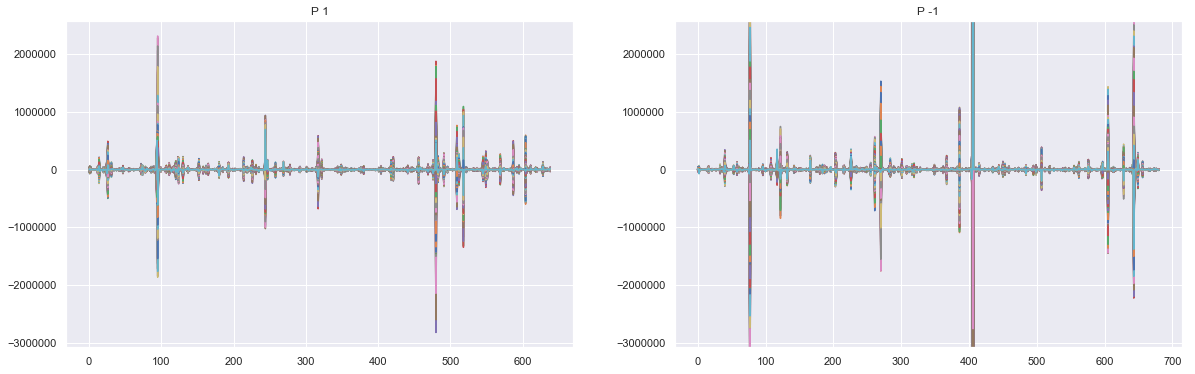

In [104]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(p1);
plt.title("P 1")
a = plt.ylim()
plt.subplot(1,2,2)
plt.plot(p_1);
plt.ylim(a)
plt.title("P -1")
print(p1.shape)
print(p_1.shape)

Let's create a function to calculate entropy for each raw

In [95]:
def ent(data):
    pk= data.value_counts()/len(data) # calculates the probabilities
    entropy = -np.sum(pk * np.log(pk), axis=0)
    return entropy

Now we are going to calculate entropy for rows, devided by Target and visualize it

In [96]:
class1_ent = []
class_1_ent = []
for i in range (0, class1.shape[0]):
    class1_ent.append(ent(class1.iloc[i]))
for i in range (0, class_1.shape[0]):
    class_1_ent.append(ent(class_1.iloc[i]))

(639, 500)
(681, 500)


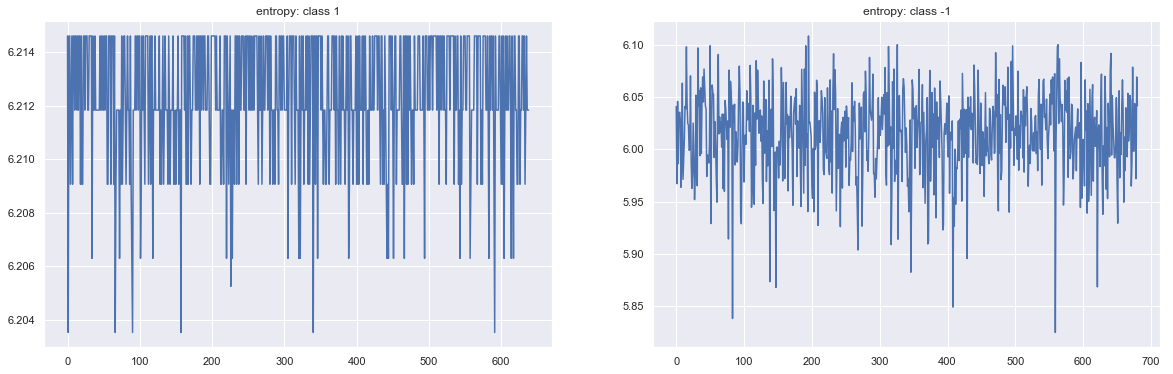

In [105]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.subplot(1,2,1)
plt.title("entropy: class 1")
plt.plot(class1_ent);
plt.subplot(1,2,2)
plt.plot(class_1_ent);
print(p1.shape)
plt.title("entropy: class -1")
print(p_1.shape)

### it looks different! Let's plot our results on one axes 

(639, 500)
(681, 500)


Text(0.5, 1.0, 'Train entropy')

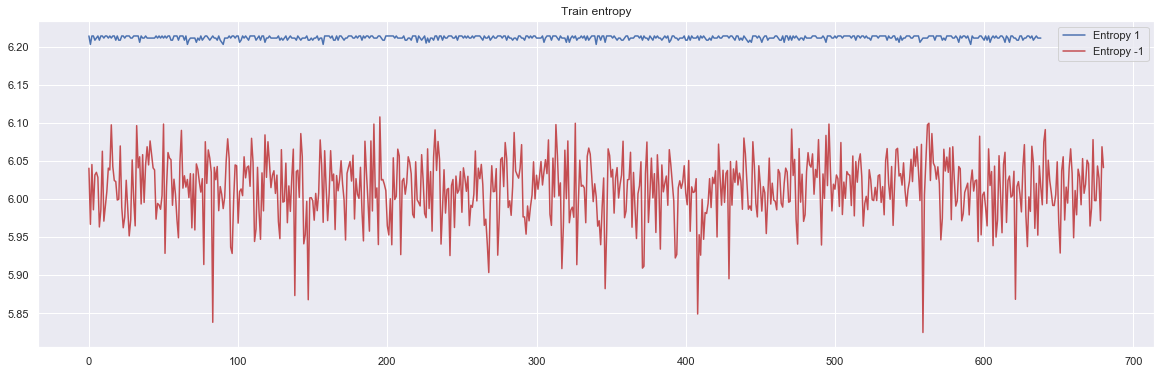

In [110]:
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(class1_ent);
plt.plot(class_1_ent,'r');
print(p1.shape)
print(p_1.shape)
plt.legend(["Entropy 1", "Entropy -1"])
plt.title("Train entropy")

# We finally did it! The entropy of each raw is tottally different in different classes! Now we can easily create a classifier and predict our Target by simple rule: weather entropy of entire raw is higher than 6.15 It is 1 class, else -1 

In [86]:
y_predicted = []
for i in range (0, y_train.shape[0]):
    if (ent(X_train.iloc[i])>6.15):
        y_predicted.append(1)
    else: y_predicted.append(-1)
print('Accuracy of prediction is {}'.format(np.mean(y_train == y_predicted)))

Accuracy of prediction is 1.0


# It looks like a mistake but it works right! 
## Let's estimate our results on test set 
# Propose a simple decision rule using the proposed features (e.g. if feature_1 > 1 and feature_2 < 5 than class=-1). Estimate accuracy of classification using the test set. 3 points.

In [87]:
y_predicted = []
for i in range (0, y_test.shape[0]):
    if (ent(X_test.iloc[i])>6.15):
        y_predicted.append(1)
    else: y_predicted.append(-1)
print('Accuracy of prediction is {}'.format(np.mean(y_test == y_predicted)))

Accuracy of prediction is 1.0


# 100% accuracy

# Conclusion
I've tried different features, different data reoresentaion. I'd thought that I've found something but test accuracy wasn't much more than 50 percents for many times. 
I've propose several features that could useful for classification: moving average, n-series, absolute maximum value, minimum value, std and others. I've tried to find correlation between column and target, tried to drop columns. I've also tried to implement FFT. But nothing of that gave any results(accuracy was near 50 percents) like a coin through. 
### Finally, I've proposed feature that is entropy of each raw and vizualized new data representaion 
The entropy of each raw was tottally different in different classes!

### After that we easily create a classifier and predict our Target by simple rule: weather entropy of entire raw is higher than 6.15 is dedicated to Target 1 and lower to Target -1 

### We estimate our results and recieve 100% accuracy on train and 100% accuracy on test. 


